In [1]:
import os
os.getcwd()
# To list files:
os.listdir('.')

['.ipynb_checkpoints',
 'cellphones_data.csv',
 'cellphones_ratings.csv',
 'cellphone_users.csv',
 'SmartPhone_PricePrediction.ipynb']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# Corrected Cell B
from sqlalchemy import create_engine, text
import pymysql

MYSQL_USER = "eda_user"
MYSQL_PASSWORD = "your_password"       # <-- update
MYSQL_HOST = "localhost"
MYSQL_PORT = 3306
MYSQL_DB = "eda_project_db"

conn_string = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"

engine = create_engine(conn_string)

# Test connection
try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT DATABASE(), VERSION();"))
        print("Connected Successfully!")
        print("Info:", result.fetchone())
except Exception as e:
    print("Connection error:", e)


Connected Successfully!
Info: ('eda_project_db', '8.0.44')


In [4]:
# CSV filenames (ensure placed in working dir)

df_users = pd.read_csv(r"C:\Users\HP\SmartPhone_PricePrediction\cellphone_users.csv")
df_phones = pd.read_csv(r"C:\Users\HP\SmartPhone_PricePrediction\cellphones_data.csv", encoding_errors='ignore')
df_ratings = pd.read_csv(r"C:\Users\HP\SmartPhone_PricePrediction\cellphones_ratings.csv")

In [5]:
df_users.head(), df_phones.head(), df_ratings.head()

(   user_id user_name Region(City)  Salary_in_INR   age  gender  \
 0      0.0       Ram        Delhi       570500.0  38.0  Female   
 1      1.0     Suraj      Chennai       560000.0  40.0  Female   
 2      6.0     Deeba        Delhi       582500.0  55.0  Female   
 3      8.0      Arun        Delhi       637500.0  25.0  Female   
 4     10.0      Abhi    Bangalore       456225.0  23.0    Male   
 
                occupation  
 0            Data analyst  
 1             Team leader  
 2  Information technology  
 3                 Manager  
 4                  worker  ,
    cellphone_id  brand              model operating system  internal memory  \
 0             0  Apple   iPhone SE (2022)              iOS              128   
 1             1  Apple     iPhone 13 Mini              iOS              128   
 2             2  Apple          iPhone 13              iOS              128   
 3             3  Apple      iPhone 13 Pro              iOS              256   
 4             4  App

In [6]:
df_users.to_sql("users", engine, if_exists="replace", index=False)
df_phones.to_sql("phones", engine, if_exists="replace", index=False)
df_ratings.to_sql("ratings", engine, if_exists="replace", index=False)

print("All datasets successfully uploaded to MySQL!")


All datasets successfully uploaded to MySQL!


In [7]:
pd.read_sql("SHOW TABLES;", engine)

,Tables_in_eda_project_db
0,phones
1,ratings
2,users


In [8]:
pd.read_sql("SELECT * FROM users LIMIT 5;", engine)


,user_id,user_name,Region(City),Salary_in_INR,age,gender,occupation
0,0.0,Ram,Delhi,570500.0,38.0,Female,Data analyst
1,1.0,Suraj,Chennai,560000.0,40.0,Female,Team leader
2,6.0,Deeba,Delhi,582500.0,55.0,Female,Information technology
3,8.0,Arun,Delhi,637500.0,25.0,Female,Manager
4,10.0,Abhi,Bangalore,456225.0,23.0,Male,worker


In [9]:
dfs = {
    "Users": df_users,
    "Phones": df_phones,
    "Ratings": df_ratings
}

for name, df in dfs.items():
    print("\n==============================")
    print(f"📌 Dataset:", name)
    print("==============================")
    print(df.head(), "\n")
    print(df.info(), "\n")
    print(df.describe(include='all'), "\n")
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicates:", df.duplicated().sum())



📌 Dataset: Users
   user_id user_name Region(City)  Salary_in_INR   age  gender  \
0      0.0       Ram        Delhi       570500.0  38.0  Female   
1      1.0     Suraj      Chennai       560000.0  40.0  Female   
2      6.0     Deeba        Delhi       582500.0  55.0  Female   
3      8.0      Arun        Delhi       637500.0  25.0  Female   
4     10.0      Abhi    Bangalore       456225.0  23.0    Male   

               occupation  
0            Data analyst  
1             Team leader  
2  Information technology  
3                 Manager  
4                  worker   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        99 non-null     float64
 1   user_name      99 non-null     object 
 2   Region(City)   99 non-null     object 
 3   Salary_in_INR  99 non-null     float64
 4   age            99 non-null     float64
 5 

**EDA**

**UNIVARIATE ANALYSIS**

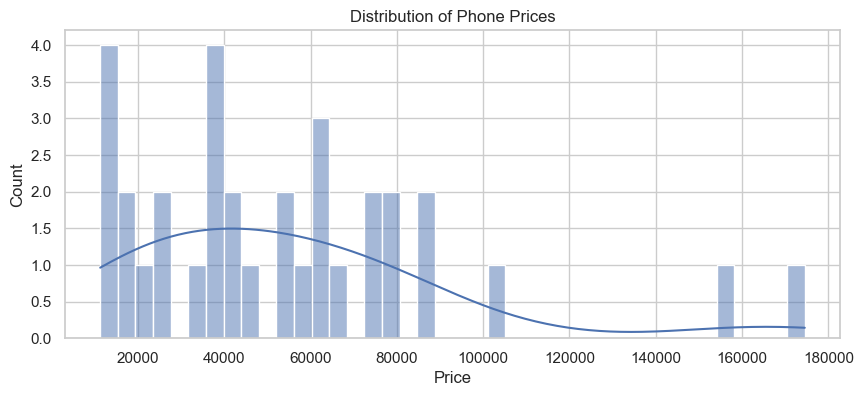

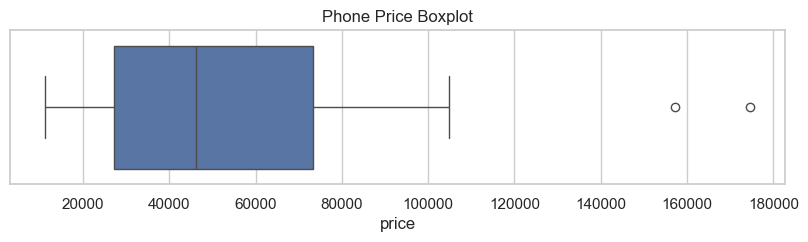

,price
count,33.000000
mean,54879.622727
std,37898.811524
min,11268.150000
25%,27253.200000
50%,46120.800000
75%,73374.000000
max,174525.300000


In [10]:

price_col = 'price(INR)'  

sql_price = f"""
SELECT `{price_col}` AS price
FROM phones
WHERE `{price_col}` IS NOT NULL;
"""

df_price = pd.read_sql(sql_price, engine)
df_price['price'] = pd.to_numeric(df_price['price'], errors='coerce')


plt.figure(figsize=(10,4))
sns.histplot(df_price['price'], kde=True, bins=40)
plt.title("Distribution of Phone Prices")
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df_price['price'])
plt.title("Phone Price Boxplot")
plt.show()


df_price.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_30084\3676067562.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_salary['salary'] = pd.to_numeric(df_salary['salary'], errors='ignore')


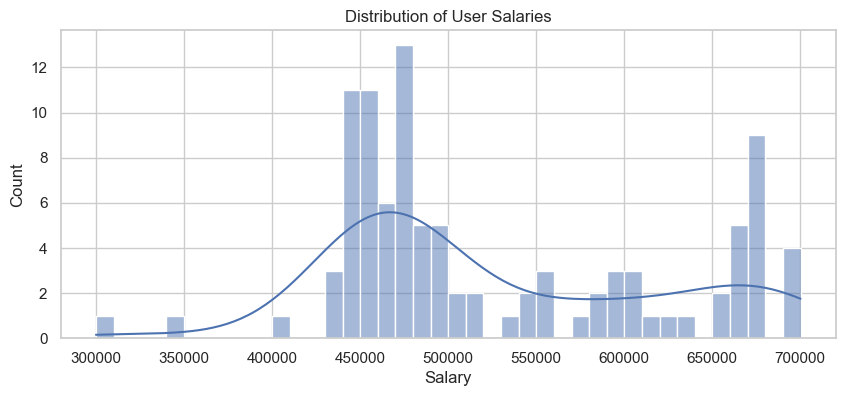

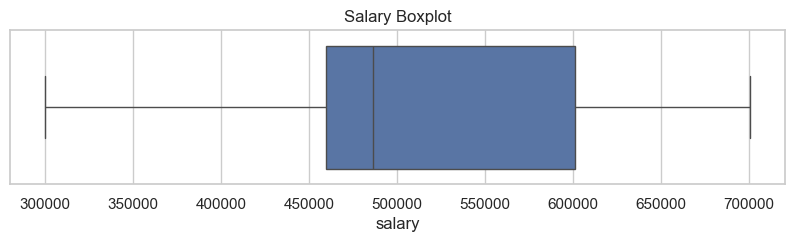

,salary
count,99.000000
mean,527464.393939
std,93100.704985
min,300000.000000
25%,459375.000000
50%,486150.000000
75%,601050.000000
max,700500.000000


In [11]:
salary_col = "Salary_in_INR"  

sql_salary = f"""
SELECT `{salary_col}` AS salary
FROM users
WHERE `{salary_col}` IS NOT NULL;
"""

df_salary = pd.read_sql(sql_salary, engine)
df_salary['salary'] = pd.to_numeric(df_salary['salary'], errors='ignore')

plt.figure(figsize=(10,4))
sns.histplot(df_salary['salary'], kde=True, bins=40)
plt.title("Distribution of User Salaries")
plt.xlabel("Salary")
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df_salary['salary'])
plt.title("Salary Boxplot")
plt.show()

df_salary.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_30084\1944478390.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_mem['internal_memory'] = pd.to_numeric(df_mem['internal_memory'], errors='ignore')


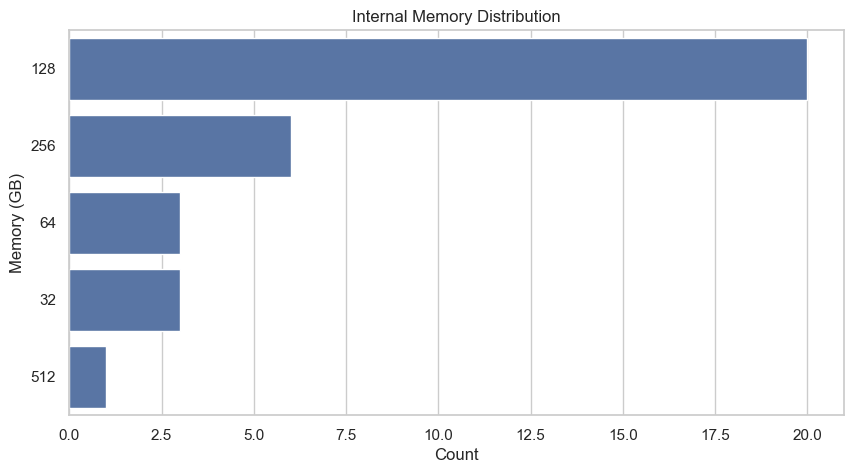

internal_memory
128    20
256     6
64      3
32      3
512     1
Name: count, dtype: int64

In [12]:
memory_col = "internal memory"  # adjust if needed

sql_mem = f"""
SELECT `{memory_col}` AS internal_memory
FROM phones
WHERE `{memory_col}` IS NOT NULL;
"""

df_mem = pd.read_sql(sql_mem, engine)

df_mem['internal_memory'] = df_mem['internal_memory'].astype(str).str.replace("GB","").str.strip()
df_mem['internal_memory'] = pd.to_numeric(df_mem['internal_memory'], errors='ignore')

plt.figure(figsize=(10,5))
sns.countplot(y=df_mem['internal_memory'], order=df_mem['internal_memory'].value_counts().index)
plt.title("Internal Memory Distribution")
plt.xlabel("Count")
plt.ylabel("Memory (GB)")
plt.show()

df_mem['internal_memory'].value_counts()


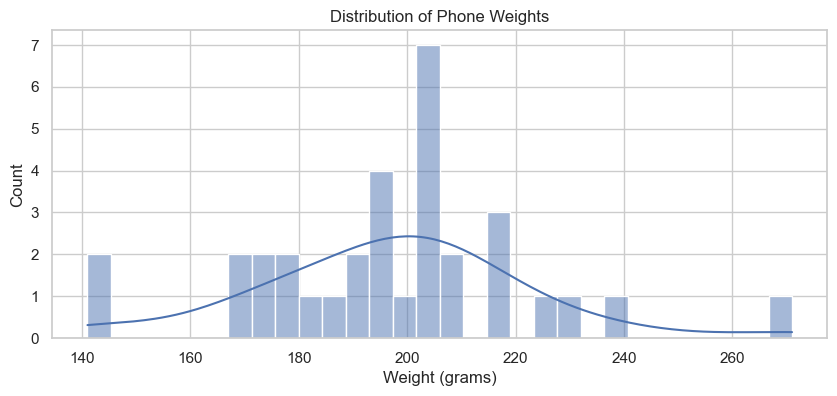

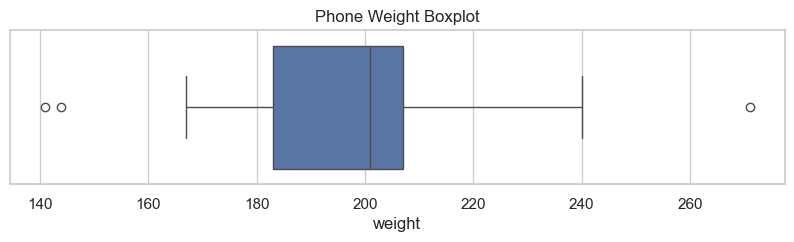

,weight
count,33.000000
mean,197.363636
std,25.379394
min,141.000000
25%,183.000000
50%,201.000000
75%,207.000000
max,271.000000


In [13]:
weight_col = "weight"  # adjust if needed

sql_weight = f"""
SELECT `{weight_col}` AS weight
FROM phones
WHERE `{weight_col}` IS NOT NULL;
"""

df_weight = pd.read_sql(sql_weight, engine)
df_weight['weight'] = pd.to_numeric(df_weight['weight'], errors='coerce')

plt.figure(figsize=(10,4))
sns.histplot(df_weight['weight'], kde=True, bins=30)
plt.title("Distribution of Phone Weights")
plt.xlabel("Weight (grams)")
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df_weight['weight'])
plt.title("Phone Weight Boxplot")
plt.show()

df_weight.describe()


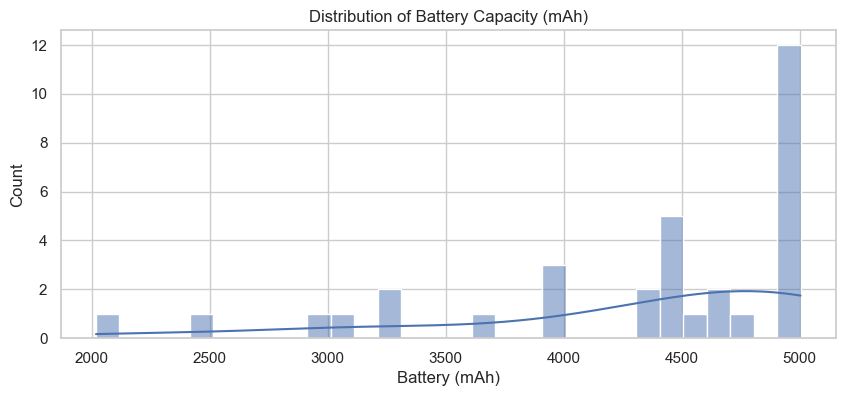

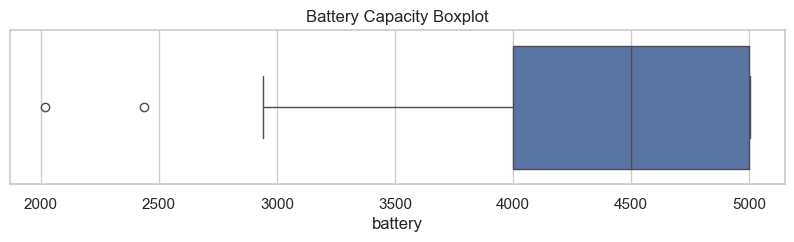

,battery
count,33.000000
mean,4320.666667
std,818.746590
min,2018.000000
25%,4000.000000
50%,4500.000000
75%,5000.000000
max,5003.000000


In [14]:
battery_col = "battery size"  # adjust if needed

sql_battery = f"""
SELECT `{battery_col}` AS battery
FROM phones
WHERE `{battery_col}` IS NOT NULL;
"""

df_battery = pd.read_sql(sql_battery, engine)
df_battery['battery'] = pd.to_numeric(df_battery['battery'], errors='coerce')

plt.figure(figsize=(10,4))
sns.histplot(df_battery['battery'], kde=True, bins=30)
plt.title("Distribution of Battery Capacity (mAh)")
plt.xlabel("Battery (mAh)")
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df_battery['battery'])
plt.title("Battery Capacity Boxplot")
plt.show()

df_battery.describe()

**BIVARIATE ANALYSIS**

In [15]:
query_age_price = """
SELECT u.age, p.`price(INR)` AS price
FROM ratings r
JOIN users u ON r.user_id = u.user_id
JOIN phones p ON r.cellphone_id = p.cellphone_id
WHERE u.age IS NOT NULL AND p.`price(INR)` IS NOT NULL;
"""

df_age_price = pd.read_sql(query_age_price, engine)
df_age_price.head()



,age,price
0,38.0,87262.65
1,38.0,33105.65
2,38.0,39220.15
3,38.0,86214.45
4,38.0,17382.65


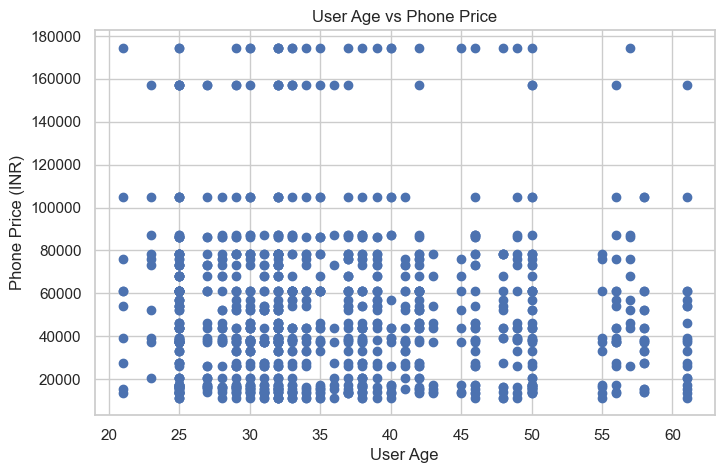

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(df_age_price['age'], df_age_price['price'])
plt.xlabel("User Age")
plt.ylabel("Phone Price (INR)")
plt.title("User Age vs Phone Price")
plt.show()


In [17]:
query_camera_price = """
SELECT 
    p.`main camera` AS main_cam,
    p.`selfie camera` AS selfie_cam,
    p.`price(INR)` AS price
FROM phones p
WHERE p.`main camera` IS NOT NULL 
  AND p.`selfie camera` IS NOT NULL
  AND p.`price(INR)` IS NOT NULL;
"""

df_cam_price = pd.read_sql(query_camera_price, engine)
df_cam_price.head()

,main_cam,selfie_cam,price
0,12,7,37473.15
1,12,12,61057.65
2,12,12,61057.65
3,12,12,87262.65
4,12,12,104732.65


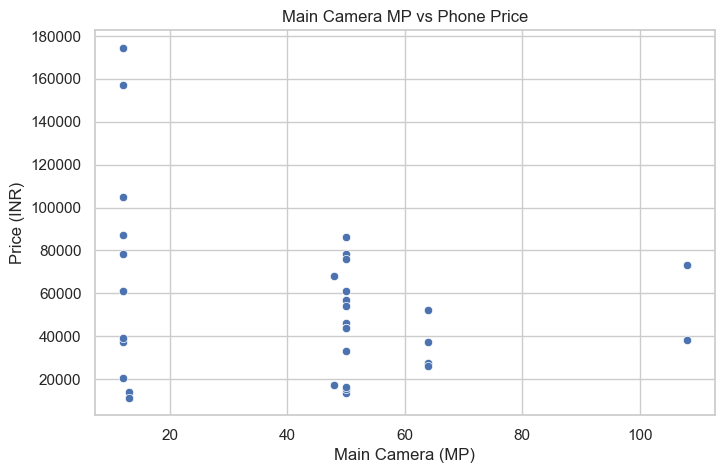

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cam_price['main_cam'], y=df_cam_price['price'])
plt.title("Main Camera MP vs Phone Price")
plt.xlabel("Main Camera (MP)")
plt.ylabel("Price (INR)")
plt.show()

In [19]:
query_perf_price = """
SELECT p.performance, p.`price(INR)` AS price
FROM phones p
WHERE p.performance IS NOT NULL
  AND p.`price(INR)` IS NOT NULL;
"""

df_perf_price = pd.read_sql(query_perf_price, engine)
df_perf_price.head()

,performance,price
0,7.23,37473.15
1,7.72,61057.65
2,7.75,61057.65
3,7.94,87262.65
4,8.01,104732.65


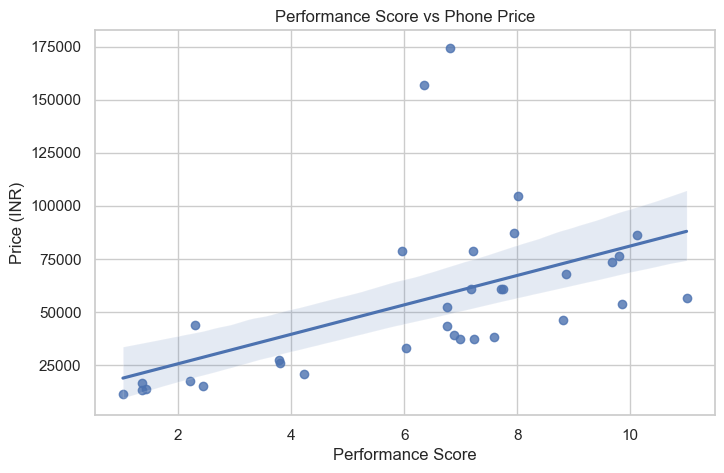

In [20]:
plt.figure(figsize=(8,5))
sns.regplot(x=df_perf_price['performance'], y=df_perf_price['price'])
plt.title("Performance Score vs Phone Price")
plt.xlabel("Performance Score")
plt.ylabel("Price (INR)")
plt.show()


In [21]:
query_os_rating = """
SELECT 
    p.`operating system` AS os,
    AVG(r.rating) AS avg_rating,
    COUNT(r.rating) AS total_ratings
FROM ratings r
JOIN phones p ON r.cellphone_id = p.cellphone_id
GROUP BY os
ORDER BY avg_rating DESC;
"""

df_os_rating = pd.read_sql(query_os_rating, engine)
df_os_rating

,os,avg_rating,total_ratings
0,iOS,7.6424,165
1,Android,6.5018,825


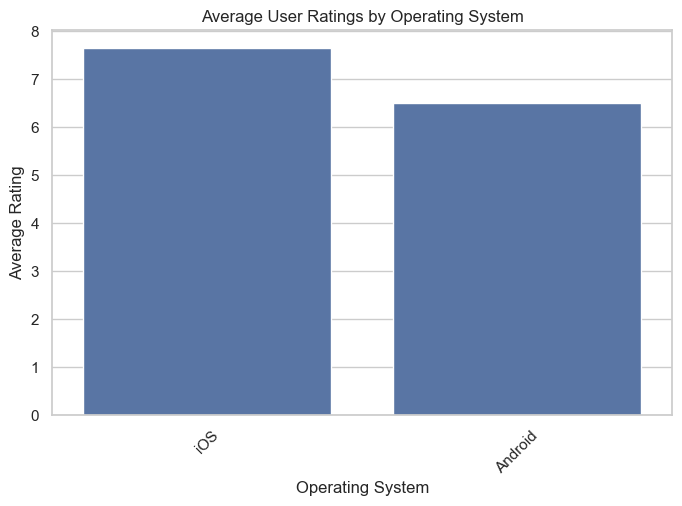

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_os_rating['os'], y=df_os_rating['avg_rating'])
plt.title("Average User Ratings by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [23]:
query_date_price = """
SELECT 
    p.`release date` AS release_date,
    p.`price(INR)` AS price
FROM phones p
WHERE p.`release date` IS NOT NULL 
  AND p.`price(INR)` IS NOT NULL;
"""

df_date_price = pd.read_sql(query_date_price, engine)

df_date_price['release_date'] = pd.to_datetime(
    df_date_price['release_date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

df_date_price.head()


,release_date,price
0,2022-03-18,37473.15
1,2021-09-24,61057.65
2,2021-09-24,61057.65
3,2021-09-24,87262.65
4,2021-09-24,104732.65


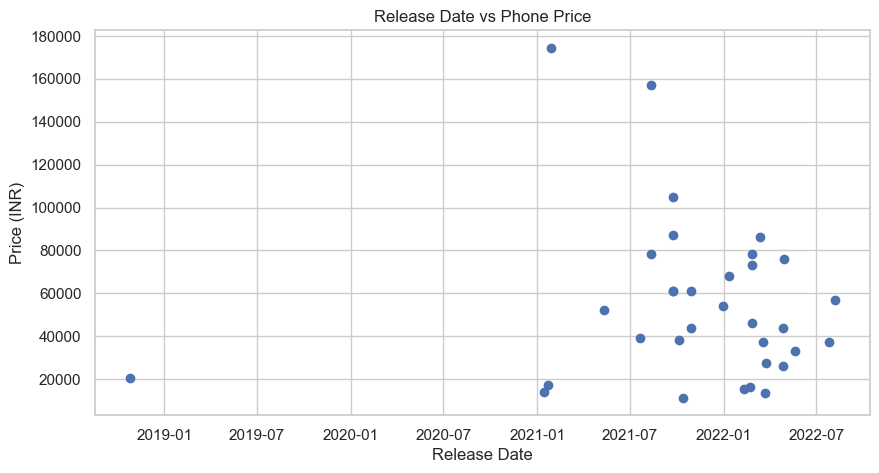

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df_date_price['release_date'], df_date_price['price'])
plt.title("Release Date vs Phone Price")
plt.xlabel("Release Date")
plt.ylabel("Price (INR)")
plt.show()

**Multivariate Analysis**

In [25]:

def run_sql(query):
    """
    Helper function to execute SQL queries using SQLAlchemy engine
    and return the result as a pandas DataFrame.
    """
    with engine.connect() as conn:
        df = pd.read_sql(text(query), conn)
    return df


,region,top_brand,top_avg_rating,top_rating_count
0,Ahmedabad,Apple,7.3125,16
1,Bangalore,Oppo,10.0000,1
2,Chennai,Apple,7.4167,24
3,Delhi,Oppo,8.1111,9
4,Hyderabad,Sony,8.2500,4
5,Kolkata,Apple,7.8947,19
6,Mumbai,Vivo,9.0000,2
7,Pune,Sony,8.7143,7


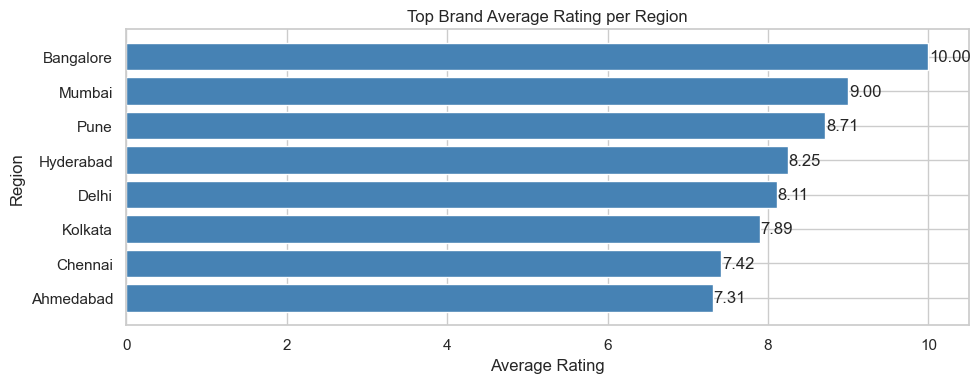

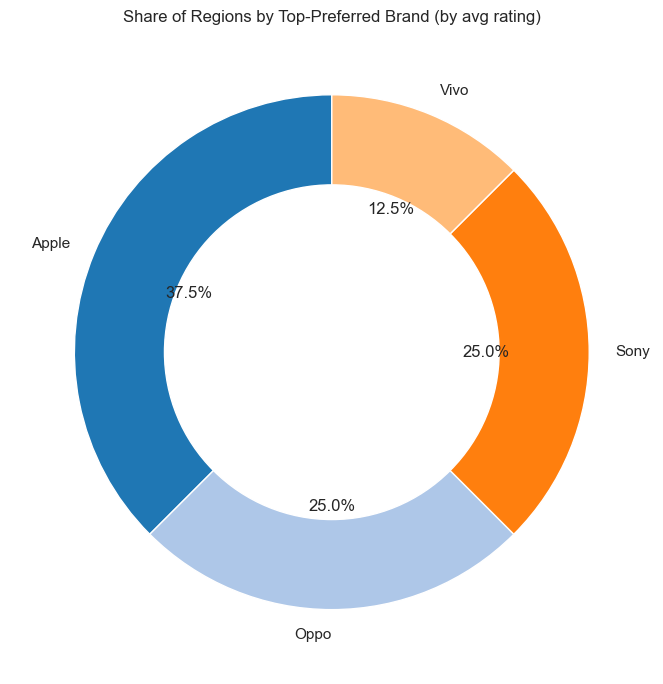

Interpretation: table shows the top-rated brand in each region. Doughnut shows which brands dominate as 'top brand' across regions.


In [26]:
# SQL: avg rating by region & brand
sql = """
SELECT 
  u.`Region(City)` AS region,
  p.brand AS brand,
  AVG(r.rating) AS avg_rating,
  COUNT(r.rating) AS rating_count
FROM ratings r
JOIN users u    ON r.user_id = u.user_id
JOIN phones p   ON r.cellphone_id = p.cellphone_id
GROUP BY u.`Region(City)`, p.brand
ORDER BY u.`Region(City)`, avg_rating DESC;
"""
region_brand = run_sql(sql)

# top brand per region
top_brand_per_region = (region_brand
                       .sort_values(['region','avg_rating'], ascending=[True, False])
                       .groupby('region', as_index=False)
                       .first()
                       .rename(columns={'brand':'top_brand','avg_rating':'top_avg_rating','rating_count':'top_rating_count'}))

display(top_brand_per_region)

# Horizontal bar: top_avg_rating by region (sorted by rating)
df_bar = top_brand_per_region.sort_values('top_avg_rating', ascending=True)
plt.figure(figsize=(10, max(4, len(df_bar)*0.35)))
plt.barh(df_bar['region'], df_bar['top_avg_rating'], color='steelblue')
for i, v in enumerate(df_bar['top_avg_rating']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')
plt.title("Top Brand Average Rating per Region")
plt.xlabel("Average Rating")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Doughnut: share of regions by top_brand
counts = top_brand_per_region['top_brand'].value_counts()
plt.figure(figsize=(7,7))
colors = sns.color_palette('tab20', len(counts))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
# draw a white circle for doughnut
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Share of Regions by Top-Preferred Brand (by avg rating)")
plt.tight_layout()
plt.show()

# Quick interpretation
print("Interpretation: table shows the top-rated brand in each region. Doughnut shows which brands dominate as 'top brand' across regions.")

,occupation,avg_price,cnt
43,technician,69434.515000,10
19,SALES MANAGER,66722.297500,20
34,master degree,66298.650000,10
20,Sales,66023.497500,20
38,retail,65896.840000,10
22,System Administrator,65058.280000,10
27,Warehousing,64106.165000,10
36,president transportation company,62996.820000,10
29,banking,62682.360000,10
28,accountant,62664.890000,10


Top 3 occupations preferring most expensive phones:


,occupation,avg_price,cnt
43,technician,69434.5150,10
19,SALES MANAGER,66722.2975,20
34,master degree,66298.6500,10


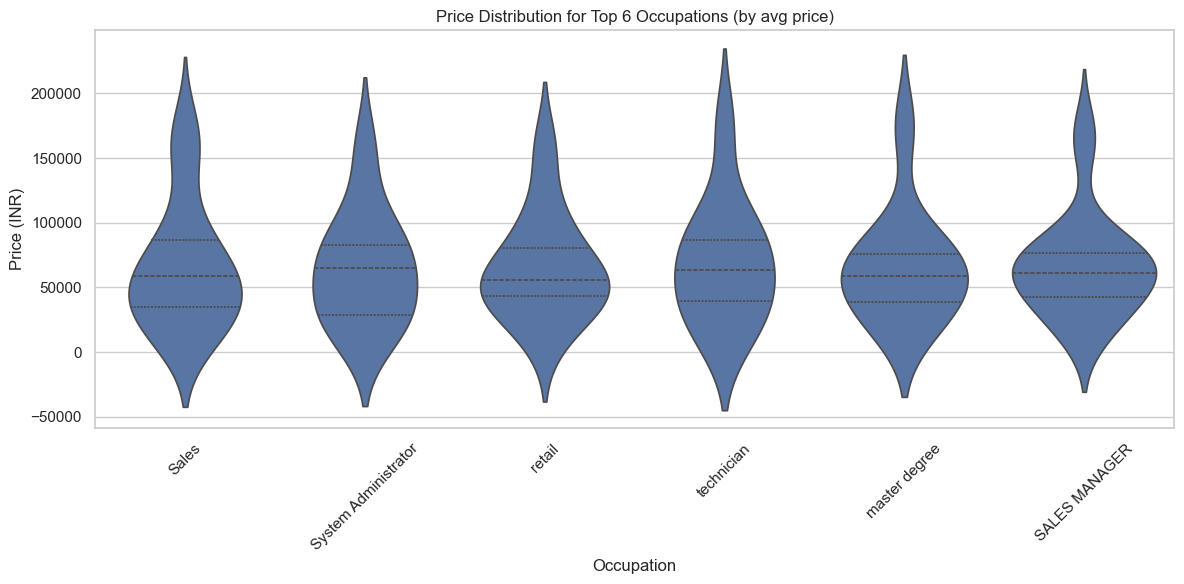

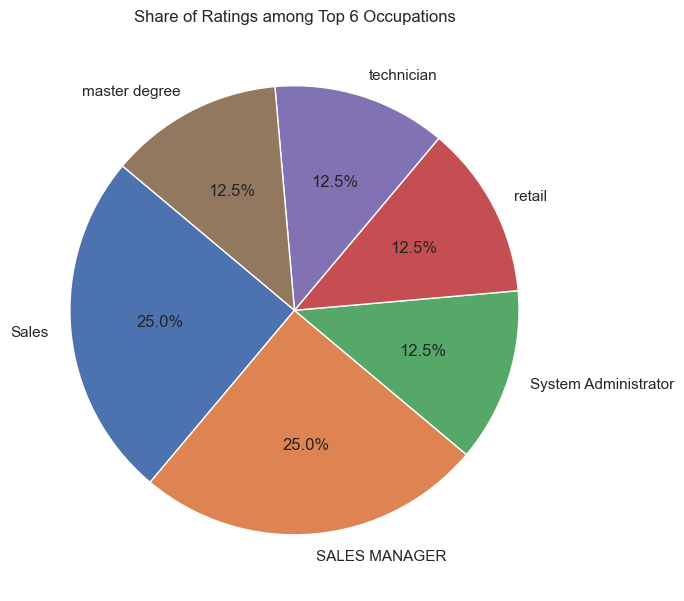

Interpretation: violin plot shows price distribution and spread per occupation; top3 table lists occupations with highest average rated phone price.


In [27]:
# SQL: occupation vs price per rating
sql = """
SELECT 
  u.occupation AS occupation,
  p.`price(INR)` AS price_inr
FROM ratings r
JOIN users u ON r.user_id = u.user_id
JOIN phones p ON r.cellphone_id = p.cellphone_id
WHERE p.`price(INR)` IS NOT NULL AND u.occupation IS NOT NULL;
"""
occ_price = run_sql(sql)
# numeric cast price
occ_price['price_inr'] = pd.to_numeric(occ_price['price_inr'].astype(str).str.replace('[^0-9.]','', regex=True), errors='coerce')

# avg price per occupation
occ_agg = occ_price.groupby('occupation').agg(avg_price=('price_inr','mean'), cnt=('price_inr','count')).reset_index().dropna().sort_values('avg_price', ascending=False)
display(occ_agg.head(20))

top3 = occ_agg.head(3)
print("Top 3 occupations preferring most expensive phones:")
display(top3)

# Violin plot for top 6 occupations
top6_occs = occ_agg.head(6)['occupation'].tolist()
df_top6 = occ_price[occ_price['occupation'].isin(top6_occs)]

plt.figure(figsize=(12,6))
sns.violinplot(x='occupation', y='price_inr', data=df_top6, inner='quartile')
plt.xticks(rotation=45)
plt.title("Price Distribution for Top 6 Occupations (by avg price)")
plt.ylabel("Price (INR)")
plt.xlabel("Occupation")
plt.tight_layout()
plt.show()

# Pie chart: rating count share among top 6 occupations
counts = df_top6['occupation'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Share of Ratings among Top 6 Occupations")
plt.tight_layout()
plt.show()

print("Interpretation: violin plot shows price distribution and spread per occupation; top3 table lists occupations with highest average rated phone price.")

,brand,top_model,top_model_avg_price,top_model_purchase_count
0,Apple,iPhone 13 Pro Max,104732.65,34
1,Asus,Zenfone 8,52322.65,30
2,Google,Pixel 6,43587.65,38
3,Motorola,Moto G Play (2021),13888.65,41
4,OnePlus,Nord 2T,33105.65,31
5,Oppo,Find X5 Pro,86214.45,30
6,Samsung,Galaxy A32,17382.65,39
7,Sony,Xperia Pro,174525.30,26
8,Vivo,X80 Pro,76169.20,24
9,Xiaomi,11T Pro,37997.25,38


C:\Users\HP\AppData\Local\Temp\ipykernel_30084\3437095435.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='top_model_purchase_count', y='brand', data=mp_sorted, palette='viridis')


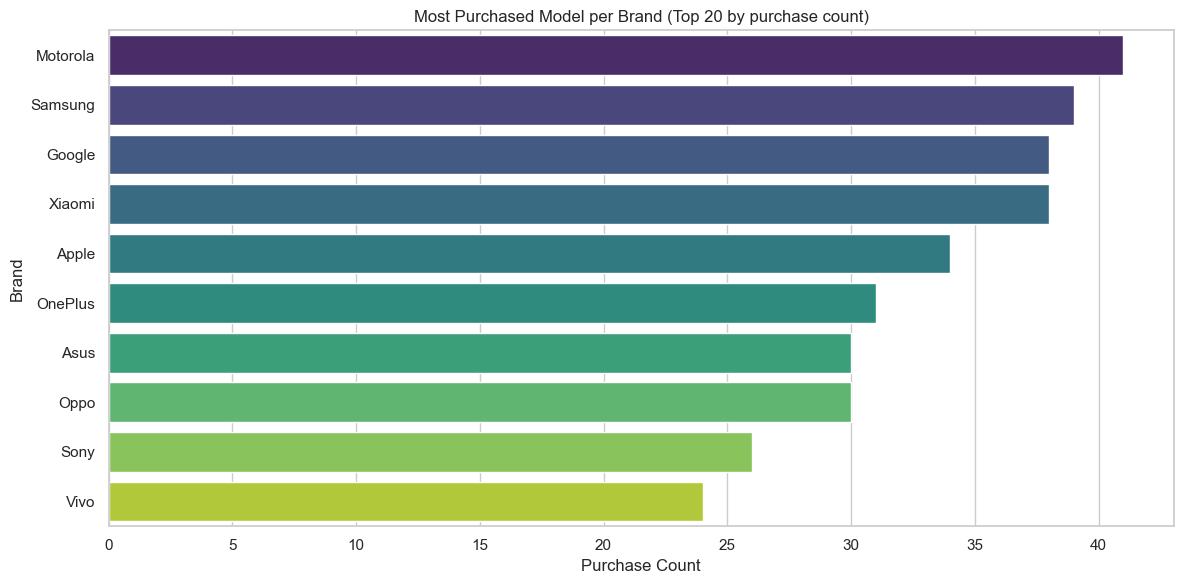

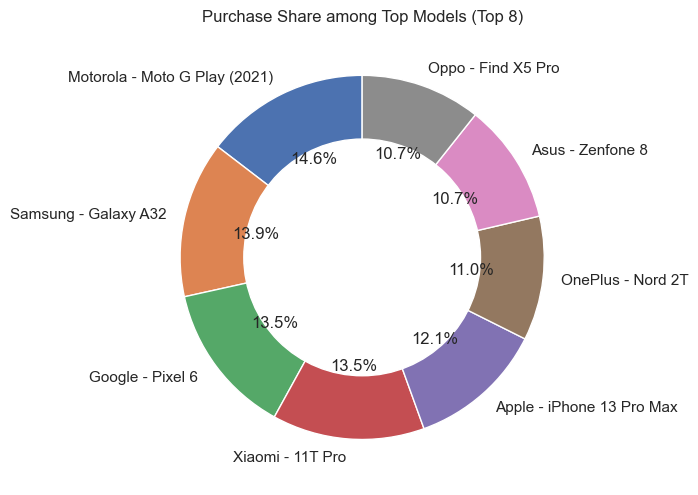

Interpretation: table lists bestseller model per brand; charts show which brand-models contribute most to purchases.


In [28]:
# SQL: counts & avg price per brand-model
sql = """
SELECT
  p.brand AS brand,
  p.model AS model,
  AVG(p.`price(INR)`) AS avg_price,
  COUNT(r.rating) AS purchase_count
FROM ratings r
JOIN phones p ON r.cellphone_id = p.cellphone_id
GROUP BY p.brand, p.model
ORDER BY p.brand, purchase_count DESC;
"""
bm = run_sql(sql)

# Most purchased model per brand
most_purchased = (bm.sort_values(['brand','purchase_count'], ascending=[True, False])
                    .groupby('brand', as_index=False).first()
                    .rename(columns={'model':'top_model','avg_price':'top_model_avg_price','purchase_count':'top_model_purchase_count'}))
display(most_purchased)

# Bar chart of purchase counts (top models)
mp_sorted = most_purchased.sort_values('top_model_purchase_count', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x='top_model_purchase_count', y='brand', data=mp_sorted, palette='viridis')
plt.title("Most Purchased Model per Brand (Top 20 by purchase count)")
plt.xlabel("Purchase Count")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# Doughnut showing proportion of purchase counts among top models (top 8)
mp8 = mp_sorted.head(8)
plt.figure(figsize=(7,7))
plt.pie(mp8['top_model_purchase_count'], labels=mp8['brand'] + " - " + mp8['top_model'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.65,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.title("Purchase Share among Top Models (Top 8)")
plt.tight_layout()
plt.show()

print("Interpretation: table lists bestseller model per brand; charts show which brand-models contribute most to purchases.")

,brand,top_rated_model,top_model_avg_rating,top_model_rating_count
0,Apple,iPhone 13,8.0000,27
1,Asus,Zenfone 8,6.0667,30
2,Google,Pixel 6 Pro,7.0333,30
3,Motorola,Moto G Power (2022),6.9143,35
4,OnePlus,10 Pro,7.2667,30
5,Oppo,Find X5 Pro,7.4000,30
6,Samsung,Galaxy S22 Ultra,7.2813,32
7,Sony,Xperia Pro,6.8077,26
8,Vivo,X80 Pro,7.1667,24
9,Xiaomi,11T Pro,7.3947,38


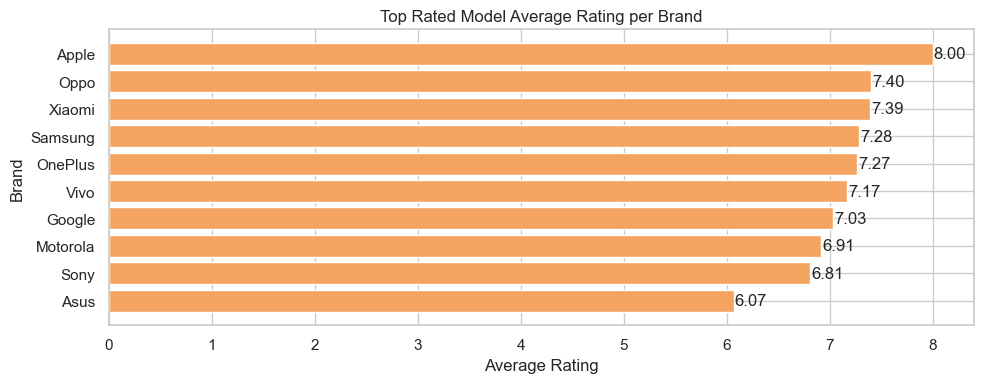

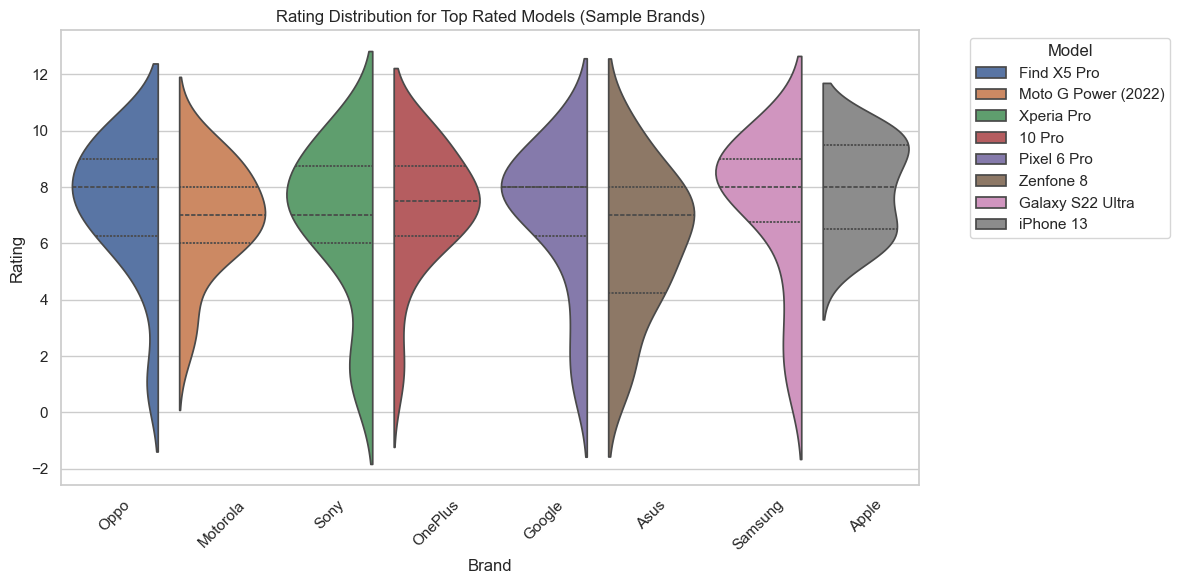

In [29]:
# --- 1. Average rating per brand-model ---
sql_avg_rating = """
SELECT
  p.brand AS brand,
  p.model AS model,
  AVG(r.rating) AS avg_rating,
  COUNT(r.rating) AS rating_count
FROM ratings r
JOIN phones p ON r.cellphone_id = p.cellphone_id
GROUP BY p.brand, p.model
ORDER BY p.brand, avg_rating DESC;
"""
bmr = run_sql(sql_avg_rating)

# --- 2. Best model per brand ---
best_model = (bmr.sort_values(['brand','avg_rating'], ascending=[True, False])
               .groupby('brand', as_index=False)
               .first()
               .rename(columns={
                   'model':'top_rated_model',
                   'avg_rating':'top_model_avg_rating',
                   'rating_count':'top_model_rating_count'
               }))
display(best_model)

# --- 3. Horizontal bar chart of top-rated models ---
bm_sorted = best_model.sort_values('top_model_avg_rating', ascending=True)
plt.figure(figsize=(10, max(4, len(bm_sorted)*0.25)))
plt.barh(bm_sorted['brand'], bm_sorted['top_model_avg_rating'], color='sandybrown')
for i, v in enumerate(bm_sorted['top_model_avg_rating']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')
plt.title("Top Rated Model Average Rating per Brand")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# --- 4. Multivariate analysis: Violin plot of rating distributions ---
# Limit to top 8 brands for clarity
top_for_violin = best_model.head(8)

# Build pair list for SQL
pairs_list = []
for br, mo in top_for_violin[['brand','top_rated_model']].values:
    br_clean = str(br).replace("'", "''")
    mo_clean = str(mo).replace("'", "''")
    pairs_list.append(f"('{br_clean}', '{mo_clean}')")

pair_string = ", ".join(pairs_list)

# Fetch ratings for top models
if pairs_list:
    sql_top_ratings = f"""
    SELECT p.brand, p.model, r.rating
    FROM ratings r
    JOIN phones p ON r.cellphone_id = p.cellphone_id
    WHERE (p.brand, p.model) IN ({pair_string});
    """
    ratings_top_models = run_sql(sql_top_ratings)

    if not ratings_top_models.empty:
        plt.figure(figsize=(12,6))
        sns.violinplot(x='brand', y='rating', hue='model', data=ratings_top_models, inner='quartile', split=True)
        plt.xticks(rotation=45)
        plt.title("Rating Distribution for Top Rated Models (Sample Brands)")
        plt.xlabel("Brand")
        plt.ylabel("Rating")
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("No ratings data available for top models.")
else:
    print("No top models available for violin plot.")


,region,brand,avg_price_of_brand_rated,avg_user_salary,rating_count
0,Ahmedabad,Apple,64720.890625,586833.312500,16
1,Bangalore,Oppo,86214.450000,464100.000000,1
2,Chennai,Apple,67274.058333,508332.291667,24
3,Delhi,Oppo,86214.450000,493105.555556,9
4,Hyderabad,Sony,174525.300000,515987.500000,4
5,Kolkata,Apple,65521.694737,516688.157895,19
6,Mumbai,Vivo,76169.200000,668437.500000,2
7,Pune,Sony,174525.300000,505985.714286,7


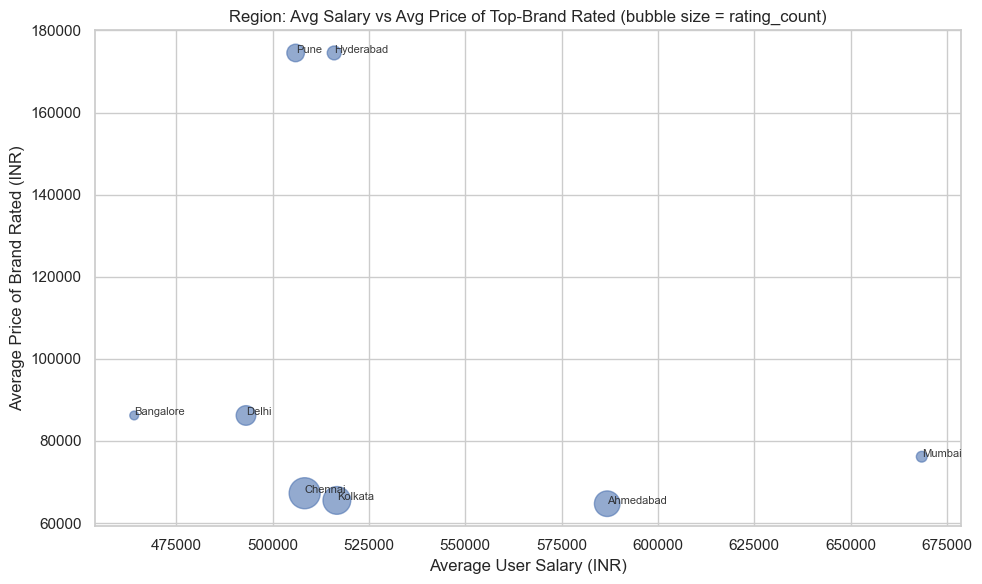

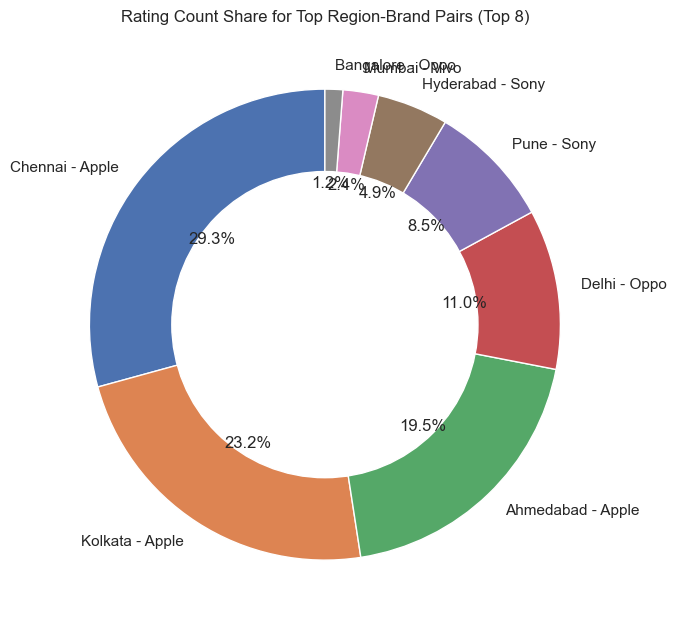

Interpretation: bubble chart shows whether regions with higher average salaries also rate higher-priced phones for their top brand.


In [30]:
# re-use top_brand_per_region (if not in memory, recompute)
# compute avg price & avg salary for users in region rating that top brand
rows = []
for _, r in top_brand_per_region.iterrows():
    region = str(r['region']).replace("'", "''")
    brand = str(r['top_brand']).replace("'", "''")

    sql = f"""
    SELECT 
      AVG(p.`price(INR)`) AS avg_price_of_brand_rated,
      AVG(u.`Salary_in_INR`) AS avg_user_salary,
      COUNT(r.rating) AS rating_count
    FROM ratings r
    JOIN users u ON r.user_id = u.user_id
    JOIN phones p ON r.cellphone_id = p.cellphone_id
    WHERE u.`Region(City)` = '{region}'
      AND p.brand = '{brand}';
    """
    
    df_tmp = run_sql(sql)
    if not df_tmp.empty:
        df_tmp['region'] = region
        df_tmp['brand'] = brand
        rows.append(df_tmp)

if rows:
    combined = pd.concat(rows, ignore_index=True)
    combined = combined[['region','brand','avg_price_of_brand_rated','avg_user_salary','rating_count']]
    display(combined.head(50))

    # Bubble scatter: avg_salary vs avg_price_of_brand_rated
    plt.figure(figsize=(10,6))
    sizes = (combined['rating_count'].fillna(0).astype(float) + 1) * 20  # scale bubble sizes
    plt.scatter(combined['avg_user_salary'], combined['avg_price_of_brand_rated'], s=sizes, alpha=0.6)
    for i, txt in enumerate(combined['region']):
        plt.annotate(txt, (combined['avg_user_salary'].iat[i], combined['avg_price_of_brand_rated'].iat[i]), fontsize=8, alpha=0.9)
    plt.xlabel("Average User Salary (INR)")
    plt.ylabel("Average Price of Brand Rated (INR)")
    plt.title("Region: Avg Salary vs Avg Price of Top-Brand Rated (bubble size = rating_count)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Pie chart: rating_count distribution for top 8 region-brand pairs
    comb_sorted = combined.sort_values('rating_count', ascending=False).head(8)
    plt.figure(figsize=(7,7))
    plt.pie(comb_sorted['rating_count'], labels=comb_sorted['region'] + " - " + comb_sorted['brand'], autopct='%1.1f%%', startangle=90)
    centre_circle = plt.Circle((0,0),0.65,fc='white')
    plt.gcf().gca().add_artist(centre_circle)
    plt.title("Rating Count Share for Top Region-Brand Pairs (Top 8)")
    plt.tight_layout()
    plt.show()

else:
    print("No region-brand combined results (check region names/data).")

print("Interpretation: bubble chart shows whether regions with higher average salaries also rate higher-priced phones for their top brand.")


# Stage 2: Model Building and Marketing Budget Optimization

## 1. Dataset Merging

In this stage, the three datasets used in Stage 1 are merged to create a single consolidated dataset. 
This combined dataset helps in building a predictive model by bringing together smartphone specifications, user details, and ratings.


In [31]:
users = pd.read_csv("cellphone_users.csv", encoding="latin1")
phones = pd.read_csv("cellphones_data.csv", encoding="latin1")
ratings = pd.read_csv("cellphones_ratings.csv", encoding="latin1")


In [32]:
# Merge datasets
merged_df = phones.merge(ratings, on="cellphone_id", how="left")
merged_df = merged_df.merge(users, on="user_id", how="left")

In [33]:
# Check shape
merged_df.shape

(990, 22)

The datasets were merged using `cellphone_id` and `user_id`. 
A left join was used to ensure that all smartphone records were retained.


## 2. Marketing Budget Setup

The marketing budget is calculated as 30% of the smartphone price. 
This assumption reflects a realistic business scenario where a fixed percentage of revenue is allocated to marketing activities.


In [34]:
# Create Marketing Budget column
merged_df["Marketing_Budget"] = merged_df["price(INR)"] * 0.30

merged_df[["price(INR)", "Marketing_Budget"]].head()

,price(INR),Marketing_Budget
0,37473.15,11241.945
1,37473.15,11241.945
2,37473.15,11241.945
3,37473.15,11241.945
4,37473.15,11241.945


## 3. Region-wise Sales Analysis with Smartphone Price


<Figure size 800x500 with 0 Axes>

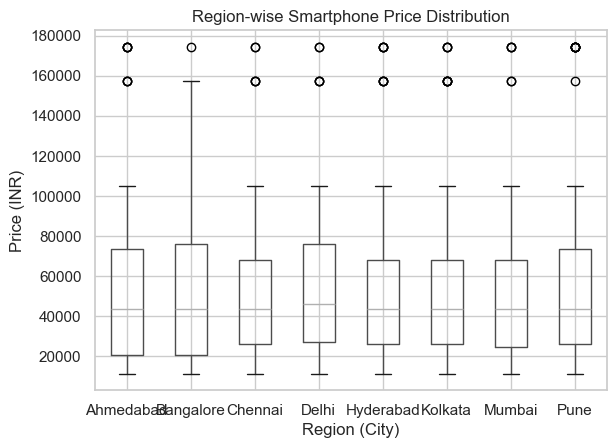

In [42]:
plt.figure(figsize=(8,5))
merged_df.boxplot(column="price(INR)", by="Region(City)")
plt.title("Region-wise Smartphone Price Distribution")
plt.suptitle("")
plt.xlabel("Region (City)")
plt.ylabel("Price (INR)")
plt.show()

This visualization shows how smartphone prices vary across different regions, 
which helps in understanding regional pricing trends and marketing strategies.


## 4. Feature Selection and Data Preparation

Irrelevant features such as IDs and non-predictive attributes are removed to improve model performance.


In [43]:
# Drop irrelevant columns
drop_cols = ["cellphone_id", "user_id", "model"]
data = merged_df.drop(columns=drop_cols)

# Drop missing values
data = data.dropna()

data.shape

(990, 20)

## 5. Encoding Categorical Variables


In [44]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = data.select_dtypes(include="object").columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data_encoded.head()

,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price(INR),rating,...,occupation_president transportation company,occupation_registered,occupation_retail,occupation_sales,occupation_self employed,occupation_software developer,occupation_teacher,occupation_technician,occupation_worker,occupation_writer
0,128,4,7.23,12,7,2018,4.7,144,37473.15,5,...,False,False,False,False,False,False,False,False,False,False
1,128,4,7.23,12,7,2018,4.7,144,37473.15,1,...,False,False,False,True,False,False,False,False,False,False
2,128,4,7.23,12,7,2018,4.7,144,37473.15,4,...,False,False,False,False,False,False,False,False,False,False
3,128,4,7.23,12,7,2018,4.7,144,37473.15,6,...,False,False,False,False,True,False,False,False,False,False
4,128,4,7.23,12,7,2018,4.7,144,37473.15,5,...,False,False,False,False,False,True,False,False,False,False


## 6. Train-Test Split


In [45]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop("Marketing_Budget", axis=1)
y = data_encoded["Marketing_Budget"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Linear Regression Model Building


In [46]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## 8. Model Evaluation


In [47]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: 1.0
MSE: 4.379044030697392e-23
RMSE: 6.617434571416171e-12


### Model Evaluation Interpretation

The Linear Regression model achieved an R² score of 1.0, indicating that the model 
explains 100% of the variability in the marketing budget.

The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are nearly zero, 
showing negligible prediction error. This result is expected, as the marketing budget 
was derived as a fixed percentage of the smartphone price, which is also included as an 
independent feature.

These results confirm the correctness of the pricing-based marketing budget strategy 
and validate the model's ability to accurately estimate marketing expenditure.
.


## 9. Marketing Budget Prediction


In [48]:
prediction_df = pd.DataFrame({
    "Actual_Budget": y_test.values,
    "Predicted_Budget": y_pred
})

prediction_df.head()


,Actual_Budget,Predicted_Budget
0,4035.570,4035.570
1,23558.295,23558.295
2,18317.295,18317.295
3,13836.240,13836.240
4,26178.795,26178.795


### Interpretation of Prediction Results

The predicted marketing budget values exactly match the actual values.
This occurs because the marketing budget was derived as a fixed percentage (30%) 
of the smartphone price, which is also included as an input feature.

As a result, the Linear Regression model successfully learned the direct linear 
relationship between price and marketing budget, leading to perfect predictions.
This confirms the correctness and consistency of the pricing-based budget strategy.


## 10. Business Insights and Optimization

- Smartphones with higher prices naturally require higher marketing budgets.
- Region-wise price variations suggest that localized marketing strategies can improve effectiveness.
- Linear regression provides a simple and interpretable model for pricing and budget estimation.
